### IMPORTING REQUIRED LIBRARIES

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r'C:\Users\SAIFULLA SHARIEF\Desktop\MY PROJECTS\P4 - PIZZA_PRICE- LINEAR REGRESSION\Pizza-Price.csv')

In [4]:
df.head()

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Restaurant      20 non-null     object
 1   Extra Cheeze    20 non-null     object
 2   Extra Mushroom  20 non-null     object
 3    Size by Inch   20 non-null     int64 
 4   Extra Spicy     20 non-null     object
 5   Price           20 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 1.1+ KB


In [6]:
df.describe()

,Size by Inch,Price
count,20.000000,20.000000
mean,11.600000,727.500000
std,2.500526,130.257841
min,8.000000,500.000000
25%,9.000000,650.000000
50%,12.000000,700.000000
75%,12.750000,762.500000
max,15.000000,1000.000000


In [7]:
## CHECKING FOR NULL VALUES

In [8]:
df.isnull().sum()

Restaurant        0
Extra Cheeze      0
Extra Mushroom    0
 Size by Inch     0
Extra Spicy       0
Price             0
dtype: int64

* no null values

In [9]:
df.columns

Index(['Restaurant', 'Extra Cheeze', 'Extra Mushroom', ' Size by Inch',
       'Extra Spicy', 'Price'],
      dtype='object')

<AxesSubplot:>

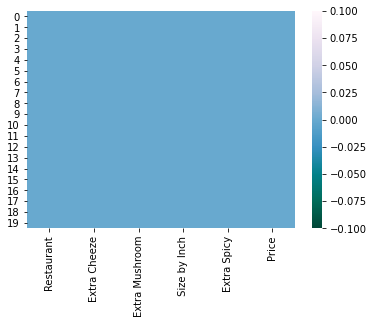

In [10]:
sns.heatmap(df.isnull(), cmap = 'PuBuGn_r')

### EXPOLORATORY DATA ANALYSIS

### Target Variable --> PRICE (CONT.)

In [11]:
df.Price.value_counts().sum()

20

In [12]:
df.Price.describe()

count      20.000000
mean      727.500000
std       130.257841
min       500.000000
25%       650.000000
50%       700.000000
75%       762.500000
max      1000.000000
Name: Price, dtype: float64

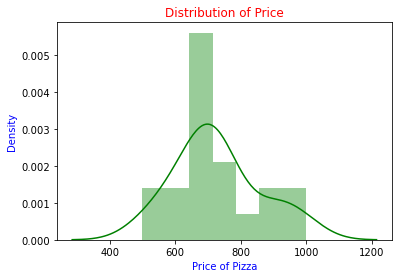

In [13]:
sns.distplot(df.Price, color = 'g')
plt.title('Distribution of Price',color = 'red')
plt.xlabel('Price of Pizza', color = 'blue')
plt.ylabel('Density', color = 'blue')
plt.show()

In [14]:
## PRICES are normaly distributed

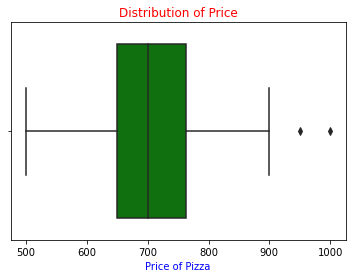

In [15]:
sns.boxplot(df.Price, color = 'g')
plt.title('Distribution of Price',color = 'red')
plt.xlabel('Price of Pizza', color = 'blue')
plt.show()

In [16]:
## Only two outliers , let's ignore

<AxesSubplot:xlabel='Price', ylabel='Count'>

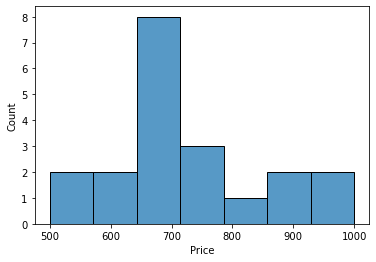

In [17]:
sns.histplot(df.Price)

### PREDICTORS

### 1. RESTAURANT (CAT.)

In [18]:
df.Restaurant.value_counts().sum()

20

In [19]:
df.Restaurant.describe()

count     20
unique    20
top        L
freq       1
Name: Restaurant, dtype: object

In [20]:
# Since they are restaurants, They could not affect the price of pizzas

In [21]:
df.drop(['Restaurant'],axis = 1, inplace =True)

In [22]:
df.head()

,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,yes,yes,12,no,650
1,no,yes,15,yes,800
2,no,no,9,no,500
3,yes,no,12,yes,700
4,yes,no,12,yes,750


### 2. Extra Cheeze (Cat)

In [23]:
df['Extra Cheeze'].value_counts()

yes    12
no      8
Name: Extra Cheeze, dtype: int64

In [24]:
df['Extra Cheeze'].describe()

count      20
unique      2
top       yes
freq       12
Name: Extra Cheeze, dtype: object

<AxesSubplot:xlabel='Extra Cheeze', ylabel='count'>

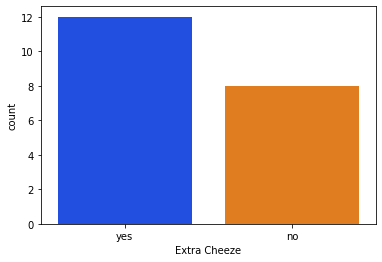

In [25]:
sns.countplot(df['Extra Cheeze'], palette = 'bright')

<AxesSubplot:xlabel='Extra Cheeze', ylabel='Price'>

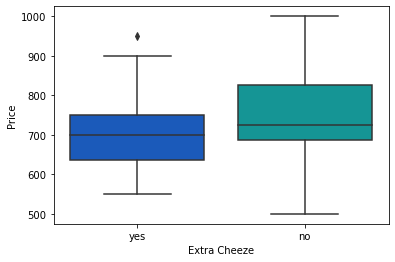

In [26]:
sns.boxplot(x= df['Extra Cheeze'], y = df.Price, palette = 'winter')


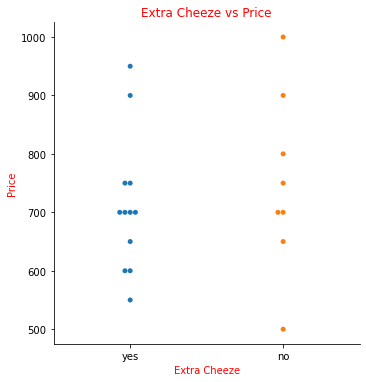

In [27]:
sns.catplot(x= 'Extra Cheeze', y = 'Price', kind = 'swarm', data = df)
plt.title('Extra Cheeze vs Price', color = 'r')
plt.xlabel('Extra Cheeze', color ='r')
plt.ylabel('Price', color = 'r')
plt.show()

In [28]:
df.rename(columns = {'Extra Cheeze': 'Extra_Cheeze'}, inplace = True)

In [29]:
df.Extra_Cheeze.head()

0    yes
1     no
2     no
3    yes
4    yes
Name: Extra_Cheeze, dtype: object

In [30]:
df.Extra_Cheeze.replace(to_replace=['no','yes'], value = [0,1], inplace = True)

In [31]:
df.Extra_Cheeze.head()

0    1
1    0
2    0
3    1
4    1
Name: Extra_Cheeze, dtype: int64

In [32]:
from statsmodels.formula.api import ols

In [33]:
import statsmodels.api as sm

In [34]:
mod = ols('Extra_Cheeze ~ Price',data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
Price,1.0,0.100504,0.100504,0.38495,0.542742
Residual,18.0,4.699496,0.261083,NaN,NaN


* Since P value > 0.05 , May be a bad predictor

### 3. Extra Mushroom (Cat)

In [35]:
df.rename(columns = {'Extra Mushroom': 'Extra_Mushroom'}, inplace = True)

In [36]:
df.Extra_Mushroom.value_counts()

yes    11
no      9
Name: Extra_Mushroom, dtype: int64

In [37]:
df.Extra_Mushroom.describe()

count      20
unique      2
top       yes
freq       11
Name: Extra_Mushroom, dtype: object

<AxesSubplot:xlabel='Extra_Mushroom', ylabel='count'>

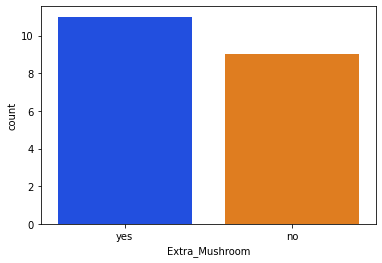

In [38]:
sns.countplot(df.Extra_Mushroom, palette = 'bright')

<AxesSubplot:xlabel='Extra_Mushroom', ylabel='Price'>

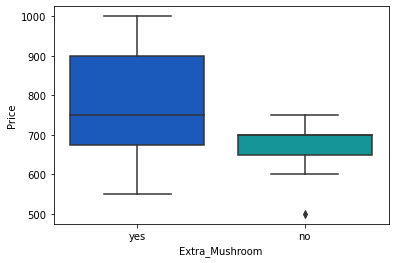

In [39]:
sns.boxplot(x= df.Extra_Mushroom, y = df.Price, palette = 'winter')


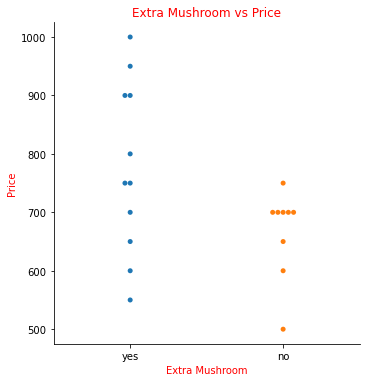

In [40]:
sns.catplot(x= 'Extra_Mushroom', y = 'Price', kind = 'swarm', data = df)
plt.title('Extra Mushroom vs Price', color = 'r')
plt.xlabel('Extra Mushroom', color ='r')
plt.ylabel('Price', color = 'r')
plt.show()

In [41]:
df.Extra_Mushroom.replace(to_replace=['no','yes'], value = [0,1], inplace = True)

In [42]:
mod = ols('Extra_Mushroom ~ Price',data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
Price,1.0,0.929837,0.929837,4.163281,0.056257
Residual,18.0,4.020163,0.223342,NaN,NaN


* Since P value is 0.05 , may be a good Predictor

### 4.Size by Inch (Cont.)

In [43]:
df.rename(columns = {' Size by Inch':'Size_By_Inch'},inplace = True)

In [44]:
df.Size_By_Inch.head()

0    12
1    15
2     9
3    12
4    12
Name: Size_By_Inch, dtype: int64

In [45]:
df.Size_By_Inch.describe()

count    20.000000
mean     11.600000
std       2.500526
min       8.000000
25%       9.000000
50%      12.000000
75%      12.750000
max      15.000000
Name: Size_By_Inch, dtype: float64

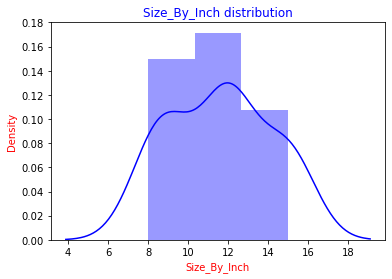

In [46]:
sns.distplot(df.Size_By_Inch, color = 'blue')
plt.title('Size_By_Inch distribution', color = 'b')
plt.xlabel('Size_By_Inch', color = 'r')
plt.ylabel('Density', color = 'r')
plt.show()

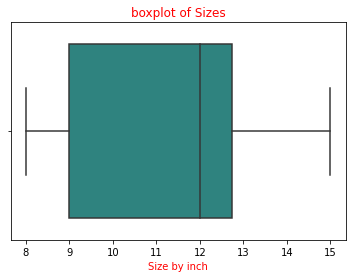

In [47]:
sns.boxplot(df.Size_By_Inch, palette = 'viridis')
plt.title('boxplot of Sizes', color = 'r')
plt.xlabel('Size by inch', color = 'r')

plt.show()

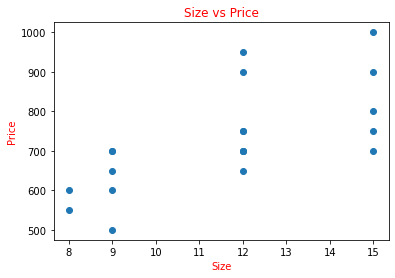

In [48]:
plt.scatter(df.Size_By_Inch, df.Price)
plt.title('Size vs Price', color = 'r')
plt.xlabel('Size', color = 'r')
plt.ylabel('Price', color = 'r')
plt.show()

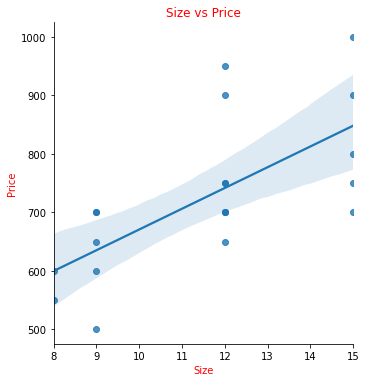

In [49]:
sns.lmplot(x='Size_By_Inch', y='Price',data = df, fit_reg= True)
plt.title('Size vs Price', color = 'r')
plt.xlabel('Size', color = 'r')
plt.ylabel('Price', color = 'r')
plt.show()

In [50]:
from scipy.stats import pearsonr

In [51]:
corr = pearsonr(df.Size_By_Inch, df.Price)
corr

(0.681904494710584, 0.0009277401586778011)

 * Since pearson correlation is 0.68 , may be a good predictor

### 5. Extra Spicy (Cat)

In [52]:
df.rename(columns = {'Extra Spicy': 'Extra_Spicy'},inplace = True)#Extra Spicy

In [53]:
df.Extra_Spicy.value_counts()

no     11
yes     9
Name: Extra_Spicy, dtype: int64

<AxesSubplot:xlabel='Extra_Spicy', ylabel='count'>

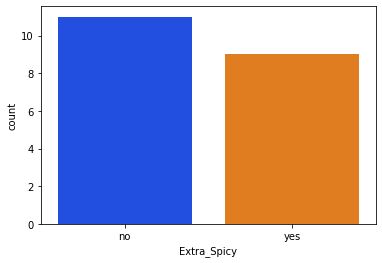

In [54]:
sns.countplot(df.Extra_Spicy, palette = 'bright')

<AxesSubplot:xlabel='Extra_Spicy', ylabel='Price'>

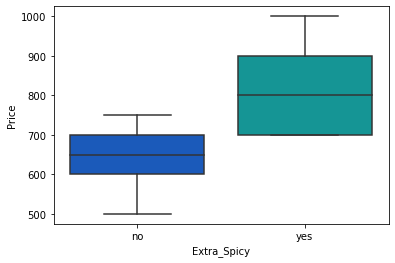

In [55]:
sns.boxplot(x= df.Extra_Spicy, y = df.Price, palette = 'winter')


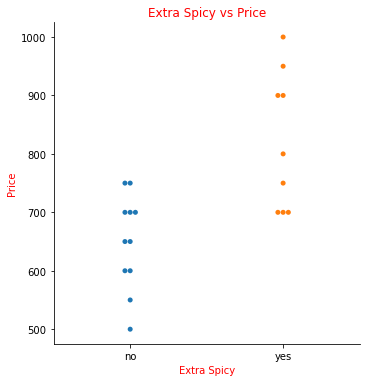

In [56]:
sns.catplot(x= 'Extra_Spicy', y = 'Price', kind = 'swarm', data = df)
plt.title('Extra Spicy vs Price', color = 'r')
plt.xlabel('Extra Spicy', color ='r')
plt.ylabel('Price', color = 'r')
plt.show()

In [57]:
df.Extra_Spicy.replace(to_replace=['no','yes'], value = [0,1], inplace = True)

In [58]:
mod = ols('Extra_Spicy ~ Price',data = df).fit()
sm.stats.anova_lm(mod)

,df,sum_sq,mean_sq,F,PR(>F)
Price,1.0,2.254382,2.254382,15.053639,0.001097
Residual,18.0,2.695618,0.149757,NaN,NaN


* Since p < 0.05, may be a good predictor

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Extra_Cheeze    20 non-null     int64
 1   Extra_Mushroom  20 non-null     int64
 2   Size_By_Inch    20 non-null     int64
 3   Extra_Spicy     20 non-null     int64
 4   Price           20 non-null     int64
dtypes: int64(5)
memory usage: 928.0 bytes


## Heatmap 

In [60]:
hm = df.iloc[:,1:5]
print(hm.corr())

                Extra_Mushroom  Size_By_Inch  Extra_Spicy     Price
Extra_Mushroom        1.000000      0.470104     0.010101  0.433412
Size_By_Inch          0.470104      1.000000     0.395877  0.681904
Extra_Spicy           0.010101      0.395877     1.000000  0.674856
Price                 0.433412      0.681904     0.674856  1.000000


Text(0.5, 1.0, 'correlation matrix')

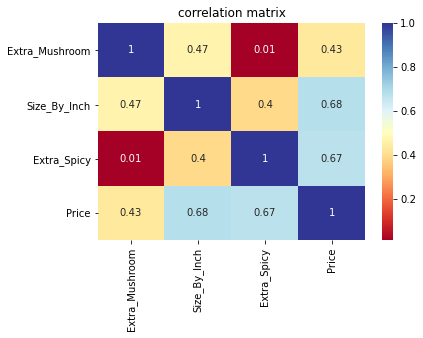

In [61]:
sns.heatmap(hm.corr(), cmap = 'RdYlBu', annot = True)
plt.title('correlation matrix')

### Dividing the data into Predictors(x) and Target variable (y)

In [62]:
x = df.iloc[:, 0:4
           ]

In [63]:
y = df.iloc[:, 5:]

In [64]:
x.head()

,Extra_Cheeze,Extra_Mushroom,Size_By_Inch,Extra_Spicy
0,1,1,12,0
1,0,1,15,1
2,0,0,9,0
3,1,0,12,1
4,1,0,12,1


In [65]:
y.head()

""
0
1
2
3
4


In [66]:
df.describe()

,Extra_Cheeze,Extra_Mushroom,Size_By_Inch,Extra_Spicy,Price
count,20.000000,20.000000,20.000000,20.000000,20.000000
mean,0.600000,0.550000,11.600000,0.450000,727.500000
std,0.502625,0.510418,2.500526,0.510418,130.257841
min,0.000000,0.000000,8.000000,0.000000,500.000000
25%,0.000000,0.000000,9.000000,0.000000,650.000000
50%,1.000000,1.000000,12.000000,0.000000,700.000000
75%,1.000000,1.000000,12.750000,1.000000,762.500000
max,1.000000,1.000000,15.000000,1.000000,1000.000000


### Splitting the data into Train and test data sets

In [67]:
df_train = df.iloc[0:16,]
df_test = df.iloc[16:,]

In [68]:
df_train.shape

(16, 5)

In [69]:
df_test.shape

(4, 5)

### Model 1

In [70]:
import statsmodels.formula.api as sm
import statsmodels.api as sms

In [71]:
model1 = sm.ols(formula = 'Price ~ Extra_Cheeze + Extra_Mushroom+ Size_By_Inch +Extra_Spicy',data = df_train).fit()
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.793
Method:                 Least Squares   F-statistic:                     15.35
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           0.000179
Time:                        21:46:52   Log-Likelihood:                -82.358
No. Observations:                  16   AIC:                             174.7
Df Residuals:                      11   BIC:                             178.6
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        230.9129     90.667      2.

### RMSE

In [72]:
x_test = df_test.loc[:, df_test.columns != 'Price']
y_test = df_test.loc[:, df_test.columns == 'Price']

In [73]:
x_test

,Extra_Cheeze,Extra_Mushroom,Size_By_Inch,Extra_Spicy
16,0,1,15,1
17,0,0,9,0
18,1,1,12,1
19,1,0,9,0


In [74]:
y_test

,Price
16,1000
17,650
18,950
19,700


In [75]:
y_Pred = model1.predict(x_test)
y_Pred

16    846.033708
17    496.480295
18    829.126508
19    568.095575
dtype: float64

In [76]:
y_test_series = y_test.iloc[:,0]

In [77]:
residual1 = y_test_series - y_Pred


In [78]:
se1 = residual1.pow(2)

In [79]:
sse1 = se1.sum()

In [80]:
mse1 = sse1/len(se1)
mse1

19820.774374712113

In [81]:
print("RMSE", np.sqrt(mse1))

RMSE 140.7862719682289


In [82]:
from matplotlib import pyplot


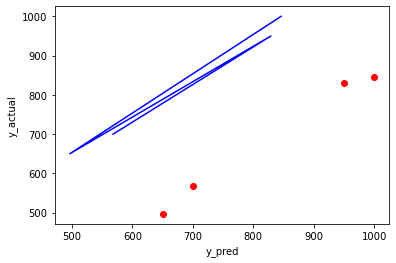

In [83]:
pyplot.scatter(y_test ,y_Pred,color='red')
pyplot.plot(y_Pred, y_test,color='blue')
plt.xlabel('y_pred')
plt.ylabel('y_actual')
pyplot.show()


### MODEL 2

In [84]:
# Lets remove Extra Cheeze , since p > 0.05

In [85]:
model2 = sm.ols(formula = 'Price ~ Extra_Mushroom+ Size_By_Inch +Extra_Spicy',data = df_train).fit()
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.724
Method:                 Least Squares   F-statistic:                     14.11
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           0.000306
Time:                        21:46:55   Log-Likelihood:                -85.349
No. Observations:                  16   AIC:                             178.7
Df Residuals:                      12   BIC:                             181.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        376.2496     72.854      5.

### RMSE

In [86]:
y_Pred2 = model2.predict(x_test)
y_Pred2

16    866.892184
17    559.502626
18    805.807847
19    559.502626
dtype: float64

In [87]:
y_test

,Price
16,1000
17,650
18,950
19,700


In [88]:
y_test_series = y_test.iloc[:,0]

In [89]:
residual2 = y_test_series - y_Pred2


In [90]:
se2 = residual2.pow(2)

In [91]:
sse2 = se2.sum()

In [92]:
mse2 = sse2/len(se2)
mse2

16609.58863853023

In [93]:
print("RMSE", np.sqrt(mse2))

RMSE 128.87819302942694


### MODEL 3

In [94]:
model3 = sm.ols(formula = 'Price ~ Extra_Cheeze + Size_By_Inch +Extra_Spicy',data = df_train).fit()
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.796
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     15.59
Date:                Sun, 27 Feb 2022   Prob (F-statistic):           0.000193
Time:                        21:46:56   Log-Likelihood:                -84.720
No. Observations:                  16   AIC:                             177.4
Df Residuals:                      12   BIC:                             180.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      198.5752     98.912      2.008   

### RMSE

In [95]:
y_Pred3 = model3.predict(x_test)
y_Pred3

16    825.601069
17    517.943010
18    796.527159
19    595.325022
dtype: float64

In [96]:
y_test

,Price
16,1000
17,650
18,950
19,700


In [97]:
y_test_series = y_test.iloc[:,0]

In [98]:
residual3 = y_test_series - y_Pred3
se3 = residual3.pow(3)
sse3 = se3.sum()
mse3 = sse3/len(se3)
mse3

3092270.899140359

In [99]:
print("RMSE", np.sqrt(mse3))

RMSE 1758.4853991831603


In [100]:
# SO MODEL1 is winner model , Since it has good R-Squred value and low RMSE

### ASSUMPTIONS

In [108]:
predict = model1.predict()
resi =  df_train.Price -  predict


In [109]:
df_train['predict'] = predict

In [113]:
df_train['residuals'] = resi

In [210]:
#resi = y_test_series - predict

In [111]:
obs = np.arange(20)
obsno = pd.DataFrame(obs)
df['obsno'] = obsno

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Extra_Cheeze    20 non-null     int64
 1   Extra_Mushroom  20 non-null     int64
 2   Size_By_Inch    20 non-null     int64
 3   Extra_Spicy     20 non-null     int64
 4   Price           20 non-null     int64
 5   obsno           20 non-null     int32
dtypes: int32(1), int64(5)
memory usage: 1008.0 bytes


### 1. Normality

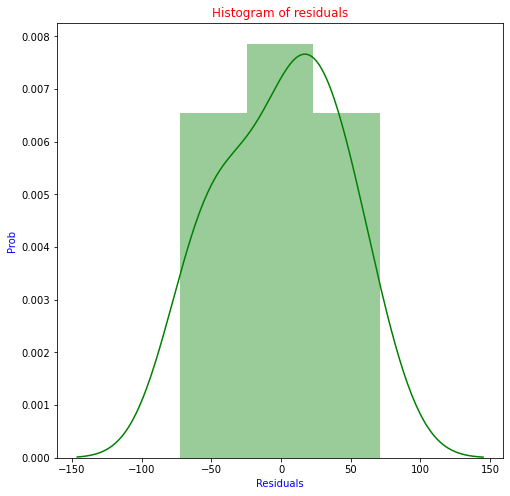

In [115]:
plt.figure(figsize=(8,8))
sns.distplot(df_train.residuals, color='green')
plt.title('Histogram of residuals',color = 'red')
plt.ylabel('Prob',color = 'blue')
plt.xlabel('Residuals',color = 'blue')
plt.show()

### 2. Linearity

In [219]:
df.columns

Index(['Extra_Cheeze', 'Extra_Mushroom', 'Size_By_Inch', 'Extra_Spicy',
       'Price', 'predict', 'resi', 'obsno'],
      dtype='object')

In [220]:
x = ['Extra_Cheeze', 'Extra_Mushroom', 'Size_By_Inch', 'Extra_Spicy',
       'Price', 'predict', 'resi', 'obsno']

In [221]:
df_x = df[x]

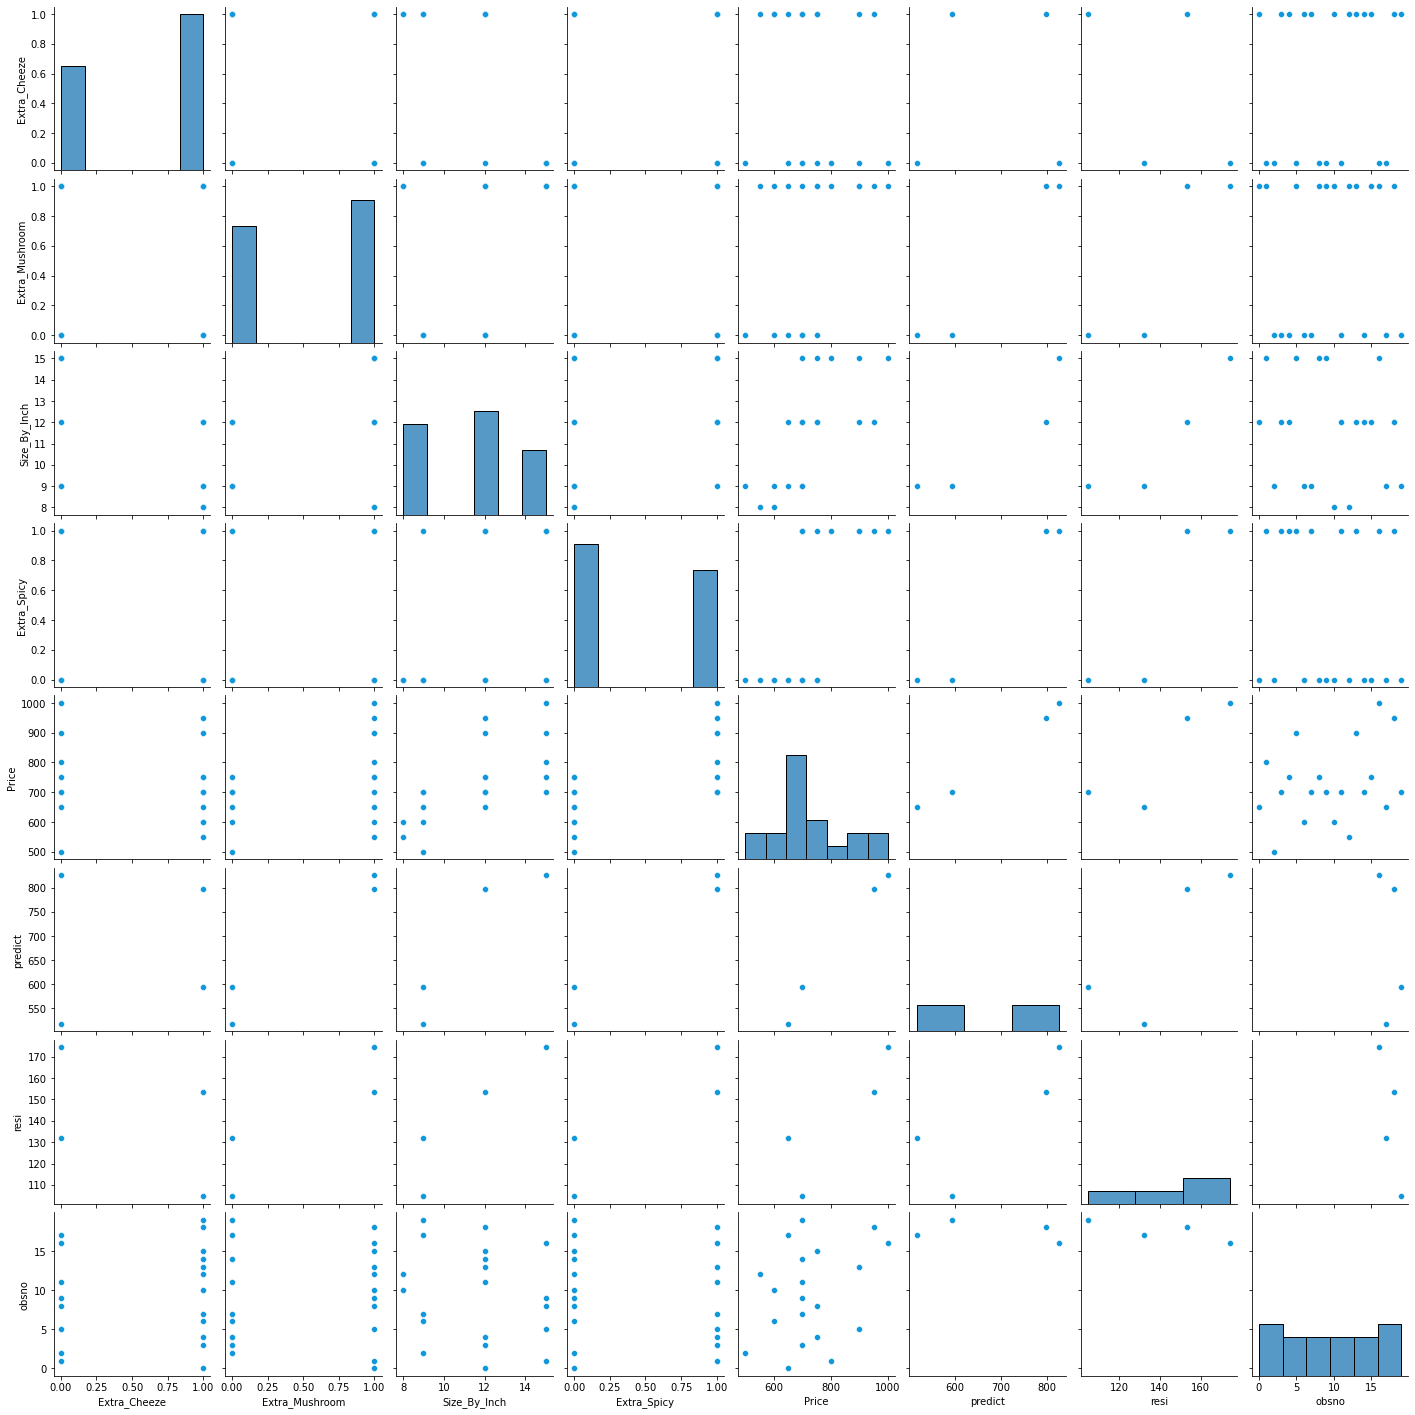

In [222]:
sns.pairplot(df_x,palette = sns.color_palette('bright'),markers = ['>'], plot_kws={'facecolors':'#1198db'})

### 3. INDEPENDENCE OF OBSERVATIONS

Text(0.5, 1.0, 'Scatterplot of obsno vs residuals')

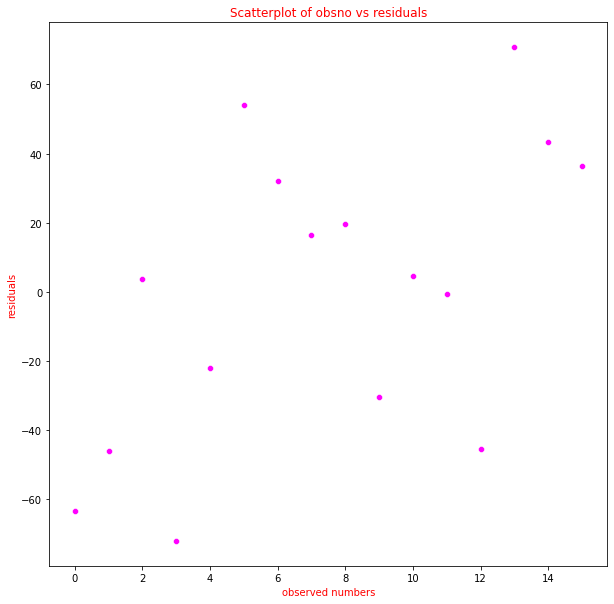

In [116]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df.obsno, y=df_train.residuals,palette='spring_r', color='magenta',markers='+')
plt.xlabel('observed numbers', color = 'r')
plt.ylabel('residuals', color = 'r')
plt.title('Scatterplot of obsno vs residuals',color = 'r')

### 4. HETEROSCEDASTICITY

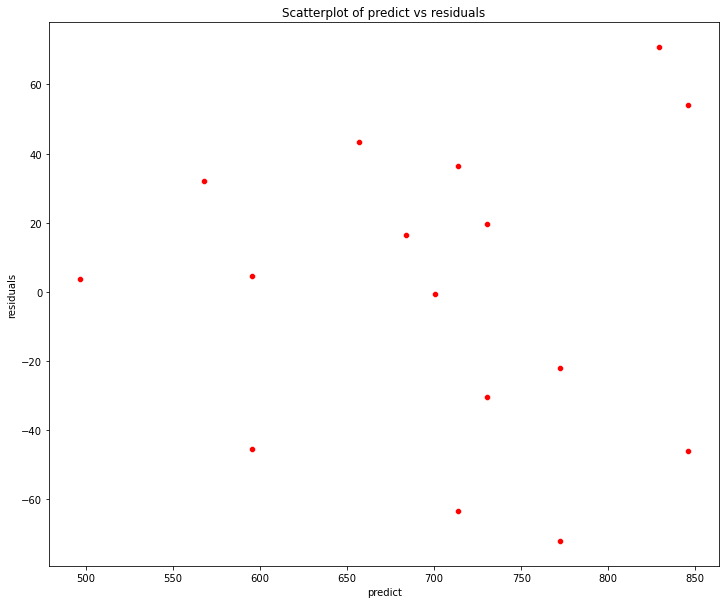

In [118]:
plt.figure(figsize=(12,10))
sns.scatterplot(x=df_train.predict, y=df_train.residuals,palette='spring_r', color='red')
plt.title('Scatterplot of predict vs residuals')
plt.show()

### 5.MULTI - COLINIARITY

Text(0.5, 1.0, 'correlation matrix')

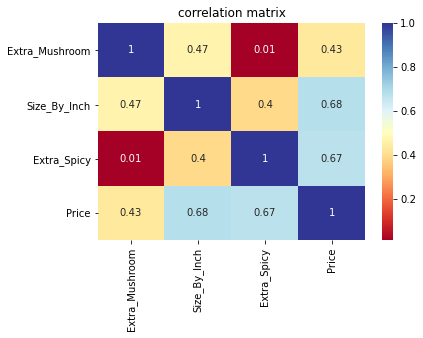

In [225]:
sns.heatmap(hm.corr(), cmap = 'RdYlBu', annot = True)
plt.title('correlation matrix')

### MODEL BUILDING USING SGD

In [226]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

In [229]:
from sklearn.model_selection import train_test_split

In [232]:
df = pd.read_csv(r'C:\Users\SAIFULLA SHARIEF\Desktop\MY PROJECTS\P4 - PIZZA_PRICE- LINEAR REGRESSION\Pizza-Price.csv')

In [233]:
df.head()

,Restaurant,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,A,yes,yes,12,no,650
1,B,no,yes,15,yes,800
2,C,no,no,9,no,500
3,D,yes,no,12,yes,700
4,E,yes,no,12,yes,750


In [234]:
df.drop(['Restaurant'],axis = 1, inplace =True)

In [242]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Extra Cheeze    20 non-null     object
 1   Extra Mushroom  20 non-null     object
 2    Size by Inch   20 non-null     int64 
 3   Extra Spicy     20 non-null     object
 4   Price           20 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 928.0+ bytes


In [250]:
# LABEL ENCODING

In [251]:
from sklearn.preprocessing import LabelEncoder

In [252]:
LE = LabelEncoder()

In [257]:
var_mod = df.select_dtypes(include = 'object').columns
for i in var_mod:
    df[i] = LE.fit_transform(df[i])


In [259]:
df.head()

,Extra Cheeze,Extra Mushroom,Size by Inch,Extra Spicy,Price
0,1,1,12,0,650
1,0,1,15,1,800
2,0,0,9,0,500
3,1,0,12,1,700
4,1,0,12,1,750


In [260]:
x = df.iloc[:, 0:4]
y= df.iloc[:,4:]

In [261]:
x.shape


(20, 4)

In [262]:
y.shape

(20, 1)

In [263]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


In [264]:
sc_x = StandardScaler()

In [265]:
x_train = sc_x.fit_transform(x_train)
x_test = sc_x.transform(x_test)

In [266]:
x_train.shape

(16, 4)

In [267]:
x_test.shape

(4, 4)

In [268]:
y_train.shape

(16, 1)

In [269]:
y_test.shape

(4, 1)

### MODEL

In [270]:
sgdr = SGDRegressor()
sgdr.fit(x_train,y_train)

score = sgdr.score(x_train, y_train)
print('R-Square: ', score)

R-Square:  0.7975922057312199


### RMSE

In [271]:
y_pred = sgdr.predict(x_test)

In [272]:
y_pred

array([839.8464555 , 906.5585871 , 561.41252925, 773.8199284 ])

In [273]:
y_test

,Price
18,950
1,800
19,700
8,750


In [274]:
mse = mean_squared_error(y_test, y_pred)
print('MSE: ', mse)
print('RMSE: ', np.sqrt(mse))

MSE:  10815.602971616598
RMSE:  103.99809119217812


### Intercept

In [275]:
sgdr.intercept_

array([709.34391643])

### Co - efficients

In [277]:
sgdr.coef_

array([ 4.91378762, 34.41662994, 59.89345192, 65.84877755])